# Credit Card Fraud Detection

## Business problem overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 
 
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

The aim of this project is to **predict fraudulent credit card transactions using machine learning models**.

## Project Pipeline

1. Data understanding
2. Exploratory data analytics (EDA)
3. Train/Test split
4. Model building / hyperparameter tuning
5. Model evaluation

Installing the required libraries

In [1]:
# %pip install numpy~=1.22.2
# %pip install pandas~=1.4.3
# %pip install matplotlib~=3.5.1
# %pip install seaborn~=0.11.2
# %pip install scikit-learn~=0.23.2
# %pip install imbalanced-learn~=0.7.0
# %pip install xgboost~=1.5.0

### Data understanding

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

*Source Kaggle: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)*

Reading the data

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

df = pd.read_csv('creditcard.csv')

Understanding the data

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory data analytics (EDA)

#### Fraudulent vs Non-Fraudulent Transactions

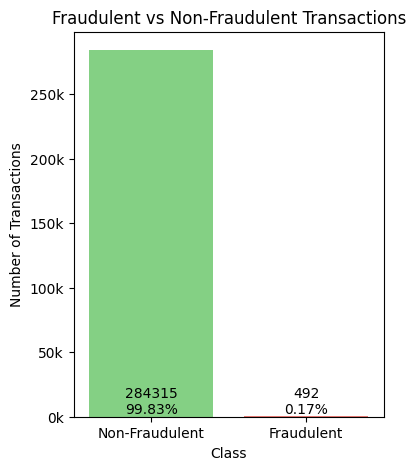

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

counts = df['Class'].value_counts()
fraud_percentage = counts[1] / len(df) * 100
non_fraud_percentage = counts[0] / len(df) * 100
class_colors = {0: '#77DD77', 1: '#FF6961'}

plt.figure(figsize=(4, 5))
ax = sns.countplot(x='Class', data=df, palette=class_colors)

plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))

# Adding percentage labels
for i in range(len(counts)):
    ax.annotate(f'{counts[i]}\n{round([non_fraud_percentage, fraud_percentage][i], 2)}%',
                xy=(i, [non_fraud_percentage, fraud_percentage][i]), ha='center', va='bottom')

plt.show()

#### Distribution of Fraudulent vs Non-Fraudulent with Time

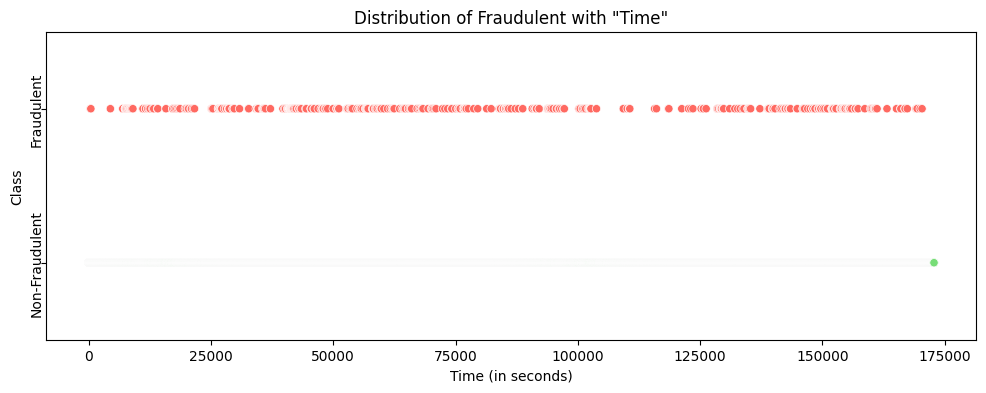

In [9]:
plt.figure(figsize=(12, 4))
ax = sns.scatterplot(x='Time', y='Class', data=df,
                     hue='Class', palette=class_colors, legend=False)

plt.title('Distribution of Fraudulent with "Time"')
plt.xlabel('Time (in seconds)')
plt.ylabel('Class')

ax.set_ylim(-0.5, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.setp(ax.get_yticklabels(), rotation=90, ha='center', va='center')

plt.show()

#### Distribution of Fraudulent vs Non-Fraudulent with Amount

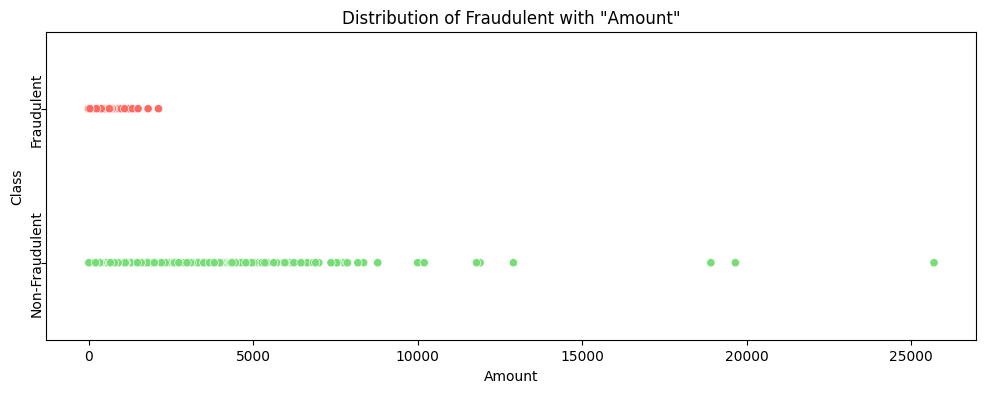

In [10]:
plt.figure(figsize=(12, 4))
ax = sns.scatterplot(x='Amount', y='Class', data=df,
                     hue='Class', palette=class_colors, legend=False)

plt.title('Distribution of Fraudulent with "Amount"')
plt.xlabel('Amount')
plt.ylabel('Class')

ax.set_ylim(-0.5, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.setp(ax.get_yticklabels(), rotation=90, ha='center', va='center')

plt.show()

#### Covariance Matrix Heatmap

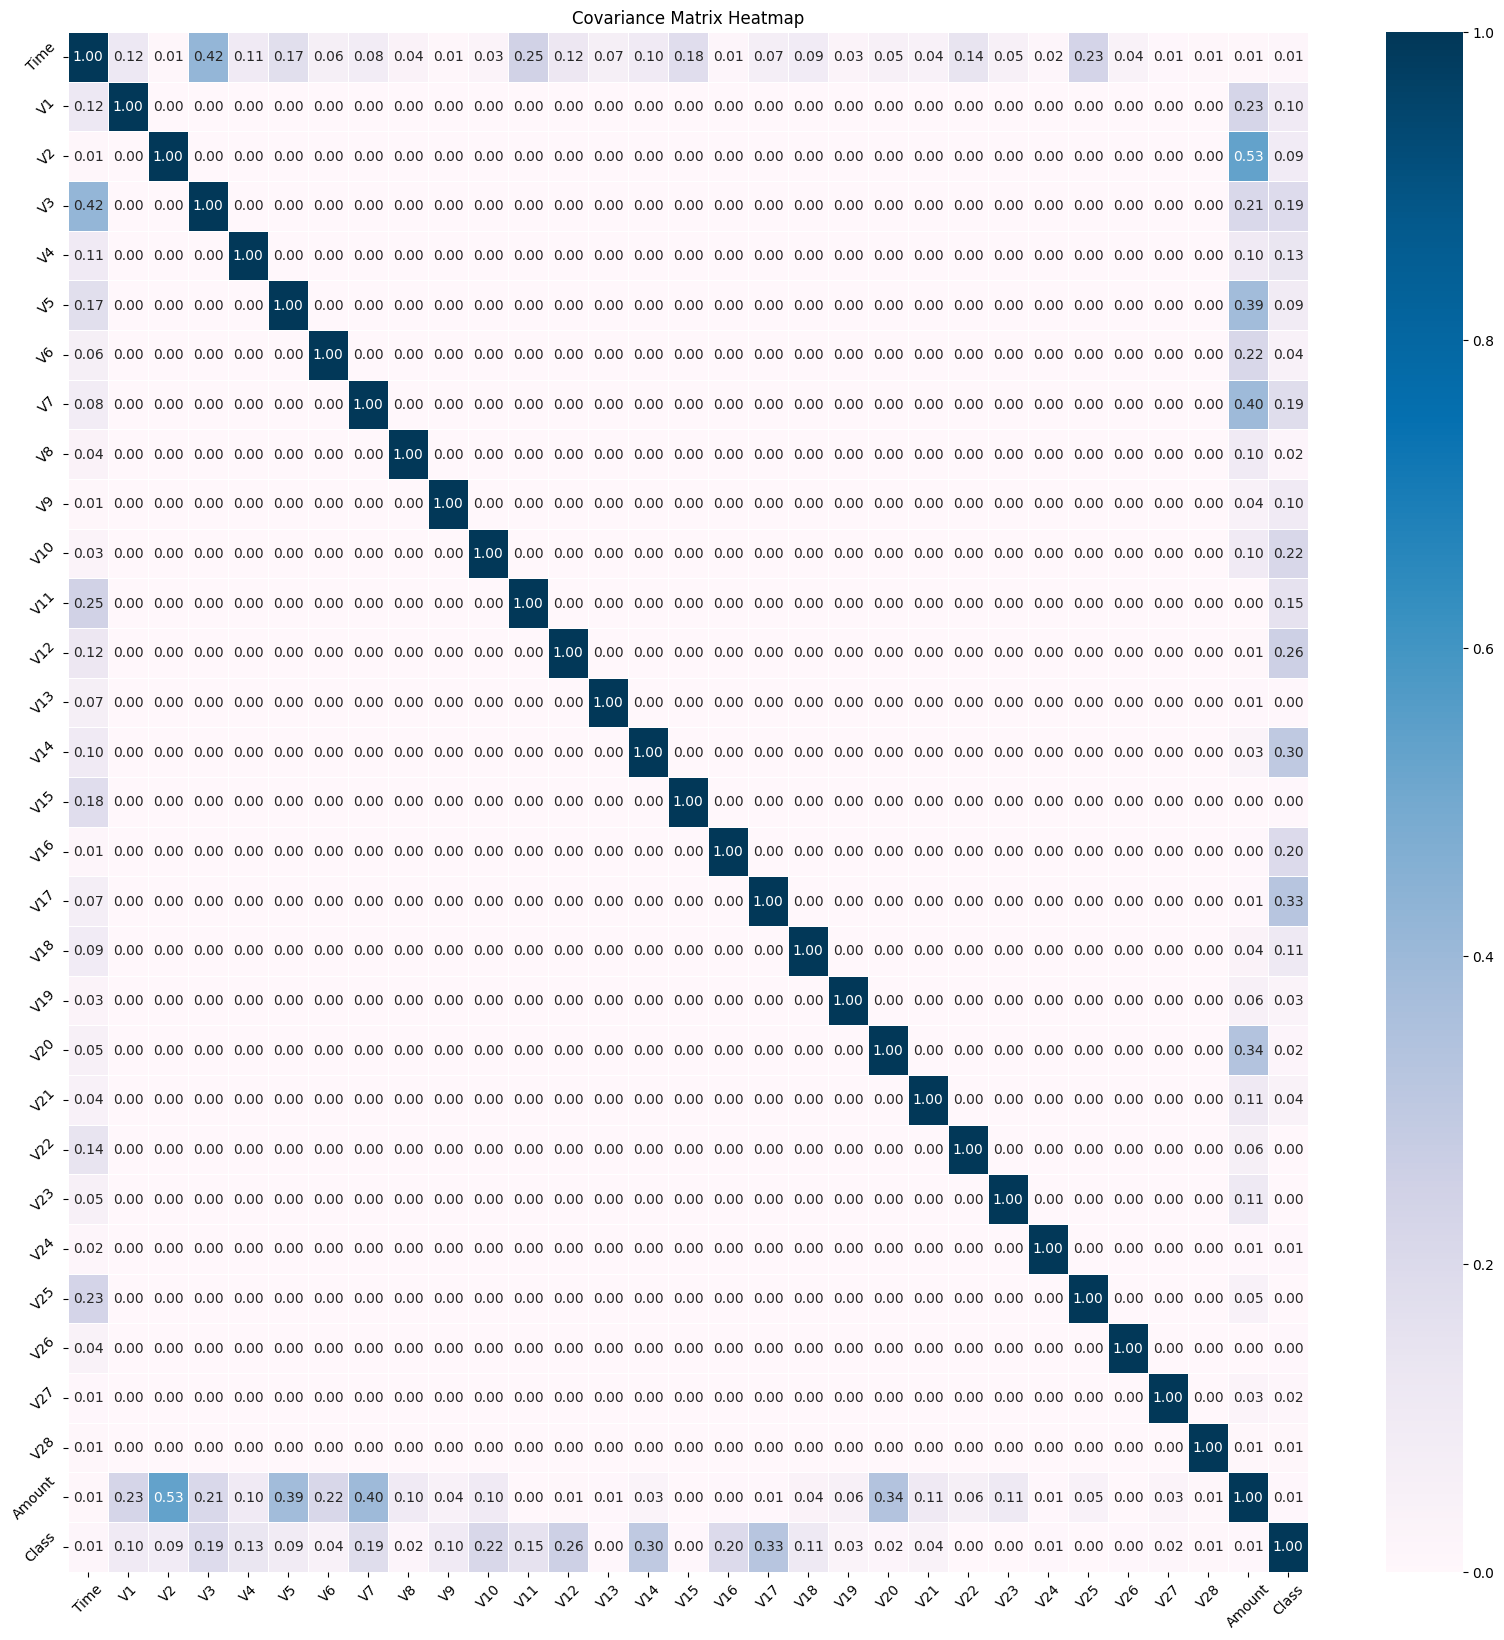

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = scaled_df.cov()

plt.figure(figsize=(20, 20))
sns.heatmap(abs(cov_matrix), cmap='PuBu', linewidths=.5, annot=True, fmt='.2f')

plt.title('Covariance Matrix Heatmap')
plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.show()

Now we can drop the features with negligible covariance with respect to target variable 

In [12]:
features_to_drop = ['Time', 'V13', 'V15',
                    'V22', 'V23', 'V24', 'V25', 'V26', 'Amount']

df.drop(features_to_drop, inplace=True, axis=1)

### Train/Test split

70/30 stratified Train/Test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df, train_size=0.7, random_state=42, stratify=df['Class'])

y_train = X_train.pop('Class')
y_test = X_test.pop('Class')

In [14]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27,V28
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,-0.001137,-0.002024,-0.001333,0.000313,0.000202,0.000302,-0.000307,-0.001291,0.001995,0.000398,-0.001388,0.000898,-0.000838,-0.002085,0.000371,-0.000433,0.000306,-0.001012,0.000459,-0.000405,0.000522
std,1.965794,1.658079,1.519820,1.416731,1.387295,1.336558,1.248395,1.198699,1.098649,1.090521,1.020959,1.000657,0.959442,0.876254,0.847186,0.839634,0.814348,0.776632,0.740233,0.407727,0.329701
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-19.214325,-14.129855,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-22.565679,-15.430084
25%,-0.919472,-0.600466,-0.890875,-0.846902,-0.691963,-0.768846,-0.553719,-0.208460,-0.640513,-0.534928,-0.763444,-0.404080,-0.426356,-0.470363,-0.482673,-0.499152,-0.455359,-0.211792,-0.228438,-0.070712,-0.052910
50%,0.017529,0.064591,0.180371,-0.020802,-0.054897,-0.273921,0.040482,0.022954,-0.050199,-0.093119,-0.033354,0.140721,0.048991,0.064578,-0.065361,-0.003663,0.004283,-0.062695,-0.029121,0.001367,0.011266
75%,1.315404,0.804932,1.026038,0.743833,0.611243,0.398847,0.571020,0.326971,0.600147,0.455546,0.737427,0.618920,0.491388,0.519755,0.401209,0.499319,0.458618,0.133000,0.186562,0.091088,0.078266
max,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,10.526766,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,31.612198,33.847808


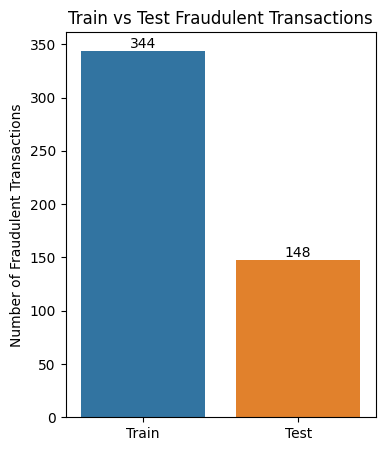

In [15]:
import numpy as np

plt.figure(figsize=(4, 5))
ax = sns.barplot(x=['Train', 'Test'], 
                 y=[np.sum(y_train), np.sum(y_test)])

plt.title('Train vs Test Fraudulent Transactions')
plt.ylabel('Number of Fraudulent Transactions')
ax.bar_label(ax.containers[0])

plt.show()

Histogram to check for skewness

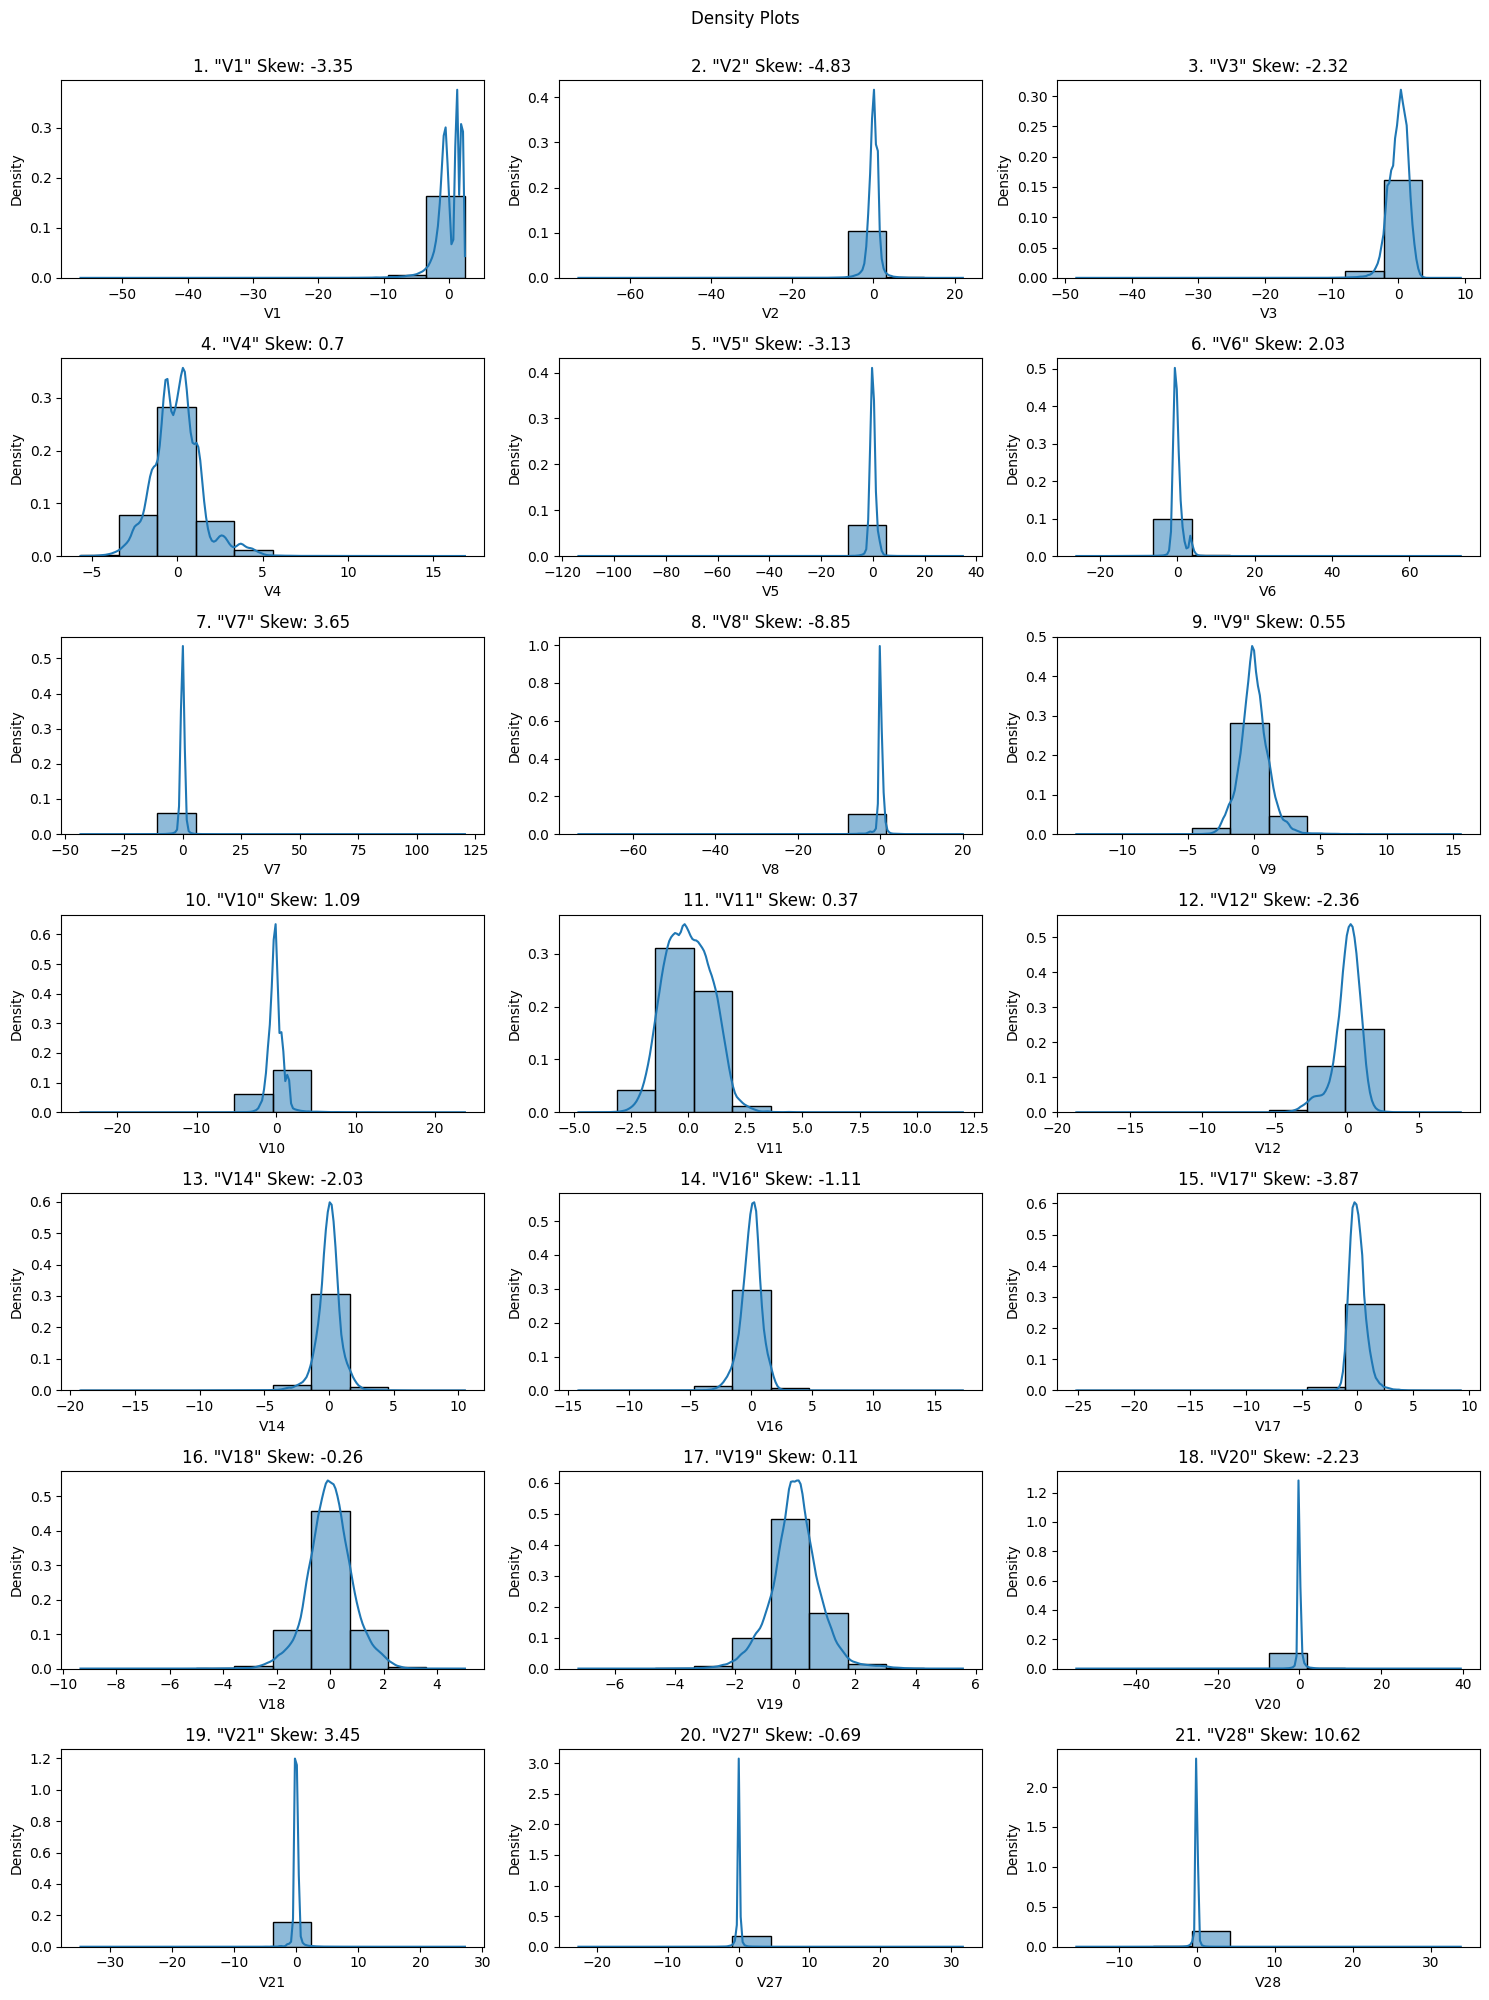

In [16]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(15, 21))
subplots = axs.flatten()

for idx, col in enumerate(X_train.columns):
    ax = subplots[idx]
    sns.histplot(x=X_train[col], ax=ax,
                 stat='density', kde=True, bins=10)
    skew = round(X_train[col].skew(), 2)
    ax.set_title(f'{idx+1}. "{col}" Skew: {skew}')

fig.suptitle('Density Plots')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

We can see a lot of features are skewed and would require to make the distribution more gaussian

In [17]:
skewed_features = ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8',
                   'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V28']

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(copy=False)

X_train_pt, X_test_pt = X_train.copy(), X_test.copy()
X_train_pt[skewed_features] = pt.fit_transform(X_train_pt[skewed_features])
X_test_pt[skewed_features] = pt.transform(X_test[skewed_features])

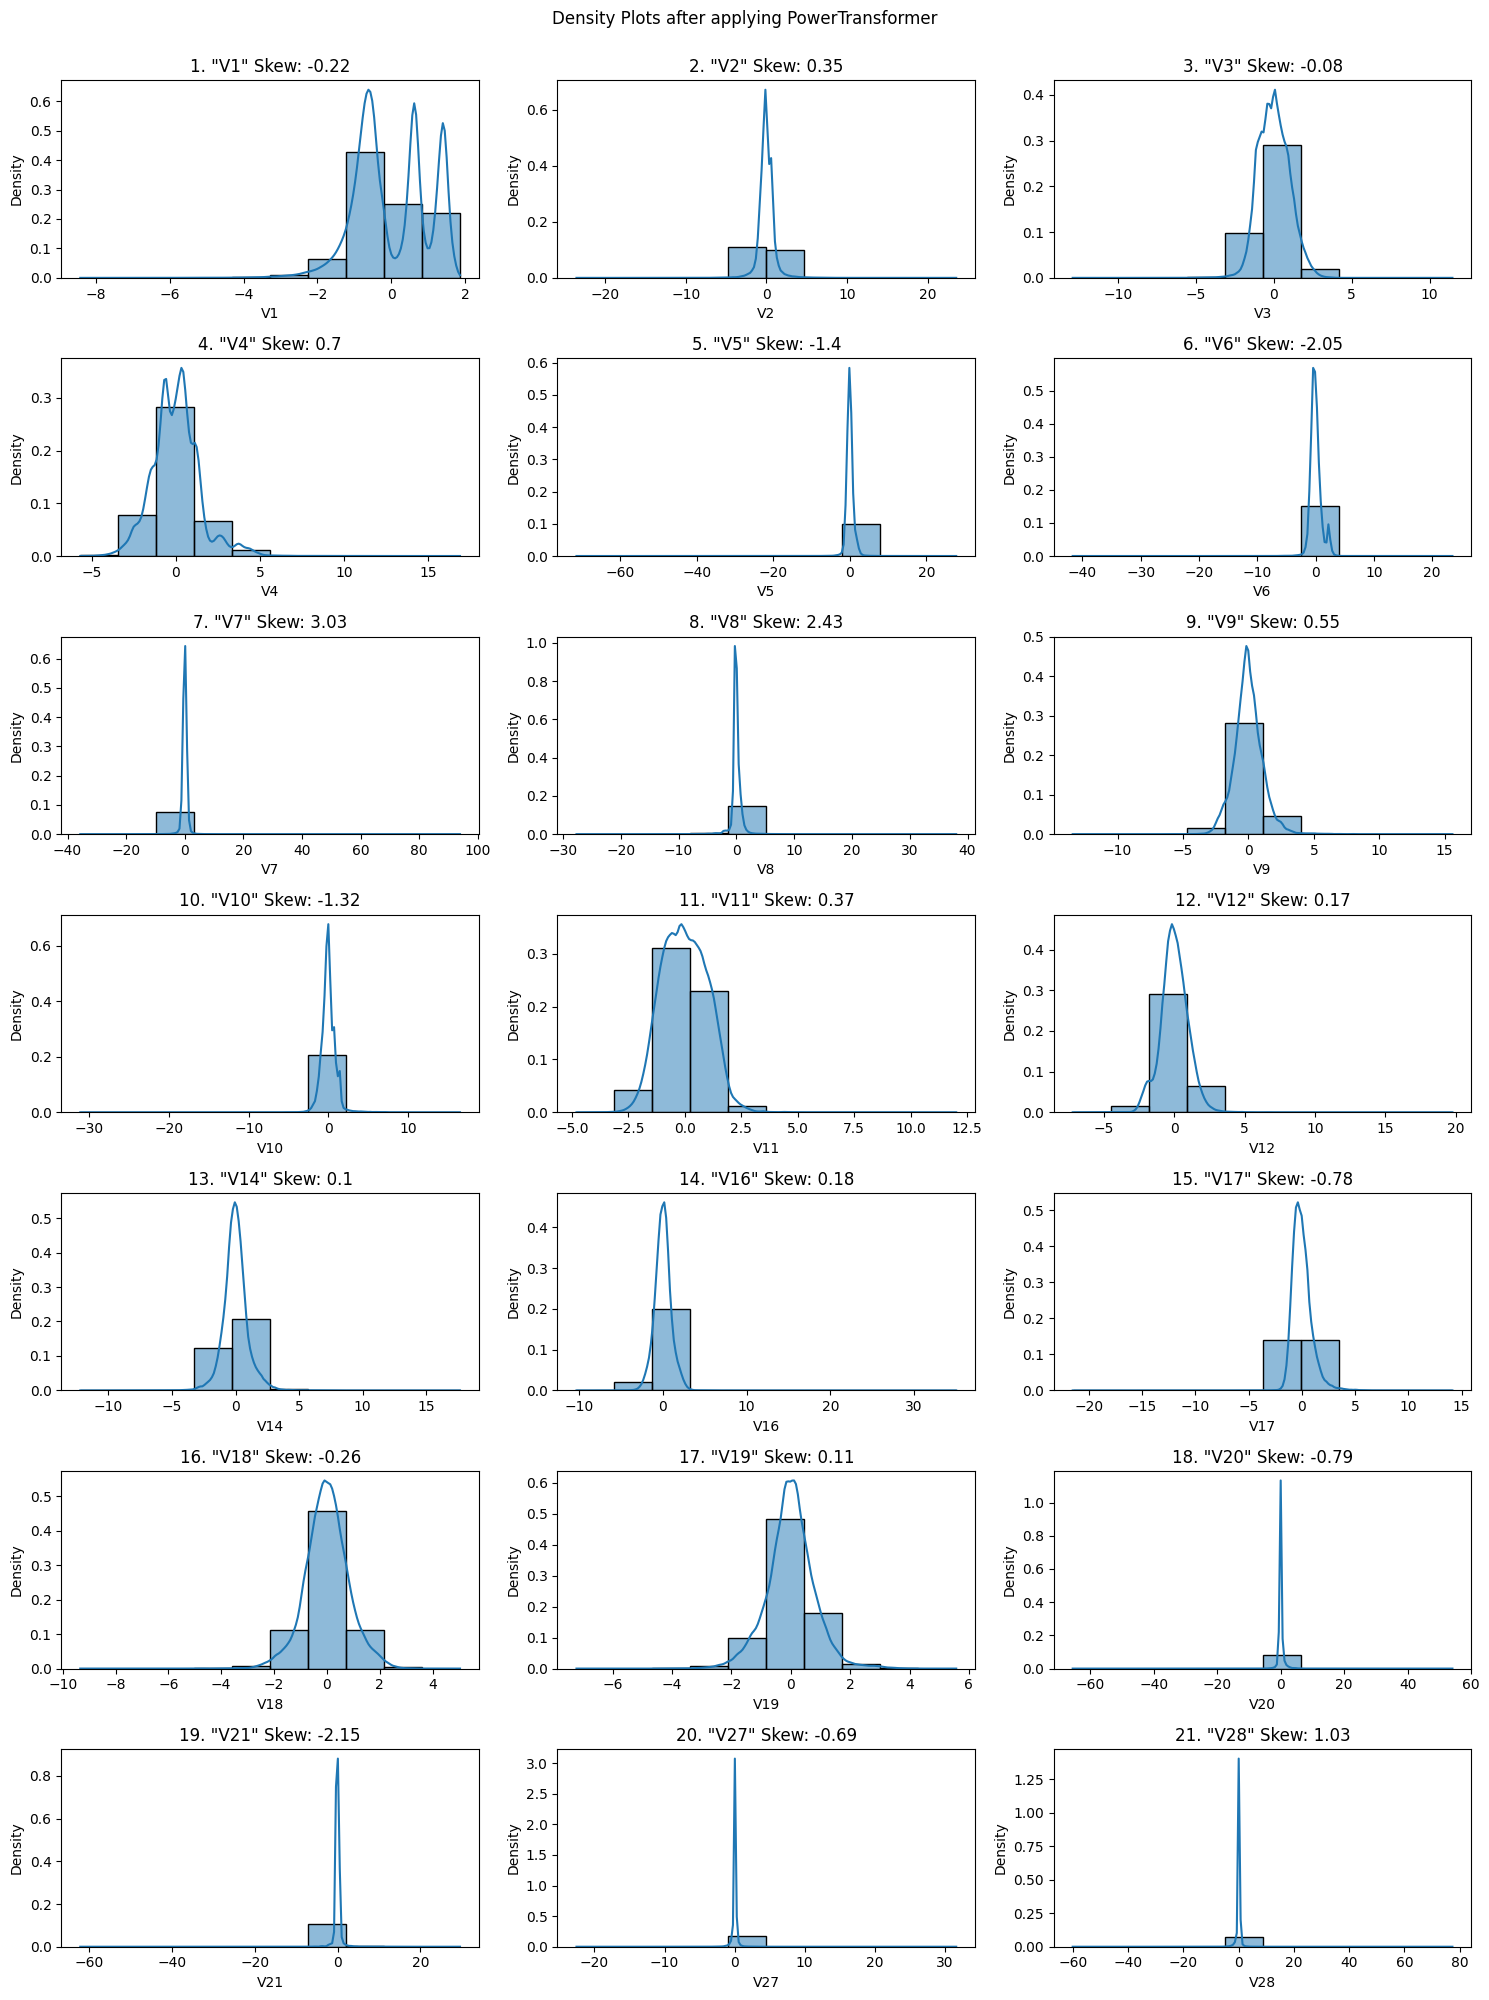

In [19]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(15, 21))
subplots = axs.flatten()

for idx, col in enumerate(X_train_pt.columns):
    ax = subplots[idx]
    sns.histplot(x=X_train_pt[col], ax=ax,
                 stat='density', kde=True, bins=10)
    skew = round(X_train_pt[col].skew(), 2)
    ax.set_title(f'{idx+1}. "{col}" Skew: {skew}')

fig.suptitle('Density Plots after applying PowerTransformer')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Model building / hyperparameter tuning

Creating folds

3 is an ideal number of folds considering the class imbalance

In [20]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=3, shuffle=True, random_state=42)

Creating a handy function to tune and compare models

ROC AUC is the metric that should be used considering the high data imbalance, and recall being an critical metric in fraud detection should be considered while choosing the right model

`ROC AUC Score = Area Under ROC Curve`

`Recall = True Positives / (True Positives + False Negatives)`


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, recall_score

model_cv_metrics = pd.DataFrame(columns=['name', 'params', 'roc_auc', 'recall', 'test_roc_auc', 'test_recall'])

def random_search(name, estimator, param_grid, X_train_, y_train_):
    model_cv = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_grid,
        n_iter=10,
        scoring='roc_auc',
        n_jobs=-1,
        cv=folds,
        verbose=1,
        random_state=42,
        return_train_score=True
    )
    
    model_cv.fit(X_train_, y_train_)

    # Scores
    y_train_pred_, y_test_pred_ = model_cv.predict(X_train_), model_cv.predict(X_test_pt)
    train_roc_auc = roc_auc_score(y_train_, y_train_pred_)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_)
    recall_train = recall_score(y_train_, y_train_pred_)
    recall_test = recall_score(y_test, y_test_pred_)

    row = [name, model_cv.best_params_, train_roc_auc, recall_train, test_roc_auc, recall_test]
    model_cv_metrics.loc[len(model_cv_metrics.index)] = row
    print(f'best_params: {model_cv.best_params_}')
    
    return model_cv

#### Model comparison

##### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr_cv_model = random_search(
    name='LogisticRegression',
    estimator=LogisticRegression(random_state=42),
    param_grid={
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg']
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits


best_params: {'solver': 'newton-cg', 'C': 0.01}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595


##### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_cv_model = random_search(
    name='KNeighborsClassifier',
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'weights': 'distance', 'n_neighbors': 11}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973


This model is over-fitting.

##### SVM

In [24]:
from sklearn.svm import SVC

svc_cv_model = random_search(
    name='SVC',
    estimator=SVC(random_state=42),
    param_grid={
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['rbf', 'sigmoid']
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'kernel': 'rbf', 'C': 0.01}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000


This model is under-fitting.

##### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_cv_model = random_search(
    name='DecisionTreeClassifier',
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270


##### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_cv_model = random_search(
    name='RandomForestClassifier',
    estimator=RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000


##### XGBoost

In [27]:
from xgboost import XGBClassifier

xgb_cv_model = random_search(
    name='XGBClassifier',
    estimator=XGBClassifier(random_state=42),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'max_leaves': [1, 2, 4]
    },
    X_train_=X_train_pt,
    y_train_=y_train
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'n_estimators': 300, 'max_leaves': 4, 'max_depth': 4, 'learning_rate': 0.05}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000


We can see that KNN, SVM, and Random Forest are too complex and not performing well for our use case, and due to limited resources we can drop these models, and due to the high class imbalance we should try over sampling to balance the classes. So far, XGBoost seems to be doing better than the rest. 

##### Feature Importance

Top var: 13
2nd top var: 10
3rd top var: 7


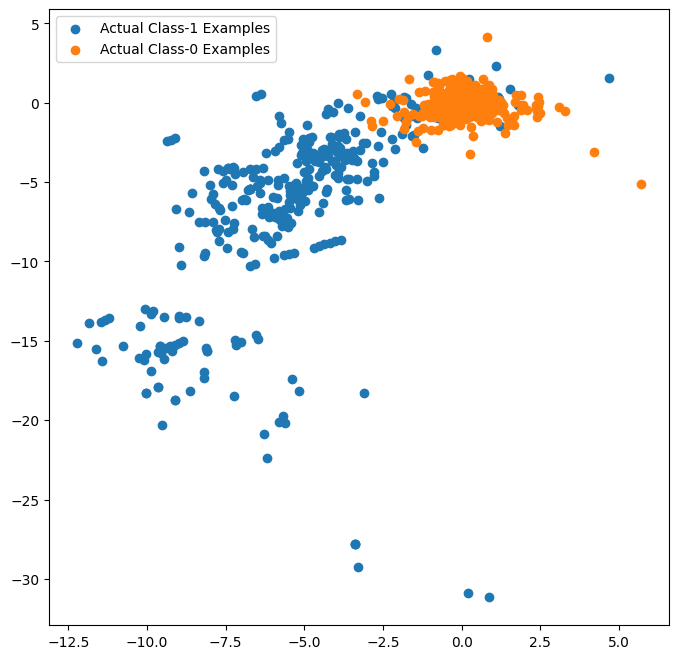

In [28]:
var_imp = []

for i in xgb_cv_model.best_estimator_.feature_importances_:
    var_imp.append(i)

feature_importances = np.sort(xgb_cv_model.best_estimator_.feature_importances_)

print('Top var:', var_imp.index(feature_importances[-1])+1)
print('2nd top var:', var_imp.index(feature_importances[-2])+1)
print('3rd top var:', var_imp.index(feature_importances[-3])+1)

top_var_index = var_imp.index(feature_importances[-1])
second_top_var_index = var_imp.index(feature_importances[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.seed(42)
np.random.shuffle(X_train_0)

plt.figure(figsize=(8, 8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

plt.legend()
plt.show()

#### Model comparison after balancing classes using random oversampling

In [29]:
try:
    from imblearn.over_sampling import RandomOverSampler
except ImportError:
    # Due to a bug in the imblearn library this doesn't get imported in first attempt but does in the second
    from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_ros, y_train_ros = over_sampler.fit_resample(X_train_pt, y_train)

In [30]:
X_train_ros.shape

(398040, 21)

##### Logistic Regression

In [31]:
ros_lr_cv_model = random_search(
    name='ROS LogisticRegression',
    estimator=LogisticRegression(random_state=42),
    param_grid={
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg']
    },
    X_train_=X_train_ros,
    y_train_=y_train_ros
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'solver': 'liblinear', 'C': 10}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378


##### Decision Tree

In [32]:
ros_dt_cv_model = random_search(
    name='ROS DecisionTreeClassifier',
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    X_train_=X_train_ros,
    y_train_=y_train_ros
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730


##### XGBoost

In [33]:
ros_xgb_cv_model = random_search(
    name='ROS XGBClassifier',
    estimator=XGBClassifier(random_state=42),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'max_leaves': [1, 2, 4]
    },
    X_train_=X_train_ros,
    y_train_=y_train_ros
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'n_estimators': 300, 'max_leaves': 4, 'max_depth': 4, 'learning_rate': 0.1}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865


Balancing classes helped improve the model performance highly. Logistic Regression seems to be doing better than the rest, while Decision Tree and XGBoost seem to be over-fitting.

##### Feature Importance

Top var: 13
2nd top var: 10
3rd top var: 4


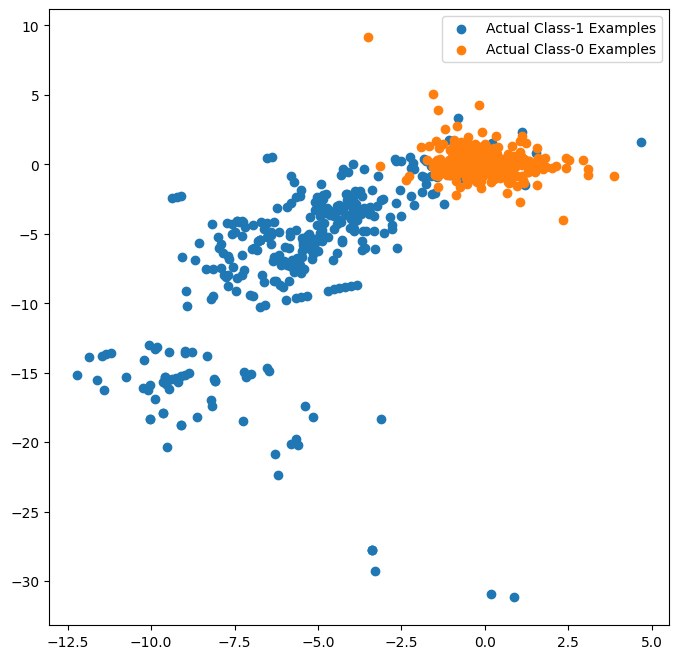

In [34]:
var_imp = []

for i in ros_xgb_cv_model.best_estimator_.feature_importances_:
    var_imp.append(i)

feature_importances = np.sort(ros_xgb_cv_model.best_estimator_.feature_importances_)

print('Top var:', var_imp.index(feature_importances[-1])+1)
print('2nd top var:', var_imp.index(feature_importances[-2])+1)
print('3rd top var:', var_imp.index(feature_importances[-3])+1)

top_var_index = var_imp.index(feature_importances[-1])
second_top_var_index = var_imp.index(feature_importances[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(8, 8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

plt.legend()
plt.show()

#### Model comparison after balancing classes using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pt, y_train)

In [36]:
X_train_smote.shape

(398040, 21)

##### Logistic Regression

In [37]:
smote_lr_cv_model = random_search(
    name='SMOTE LogisticRegression',
    estimator=LogisticRegression(random_state=42),
    param_grid={
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg']
    },
    X_train_=X_train_smote,
    y_train_=y_train_smote
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'solver': 'lbfgs', 'C': 100}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


##### Decision Tree

In [38]:
smote_dt_cv_model = random_search(
    name='SMOTE DecisionTreeClassifier',
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    X_train_=X_train_smote,
    y_train_=y_train_smote
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


##### XGBoost

In [39]:
smote_xgb_cv_model = random_search(
    name='SMOTE XGBClassifier',
    estimator=XGBClassifier(random_state=42),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'max_leaves': [1, 2, 4]
    },
    X_train_=X_train_smote,
    y_train_=y_train_smote
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'n_estimators': 300, 'max_leaves': 4, 'max_depth': 4, 'learning_rate': 0.1}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


Balancing using SMOTE helped improve the performance further. 

##### Feature Importance

Top var: 13
2nd top var: 10
3rd top var: 4


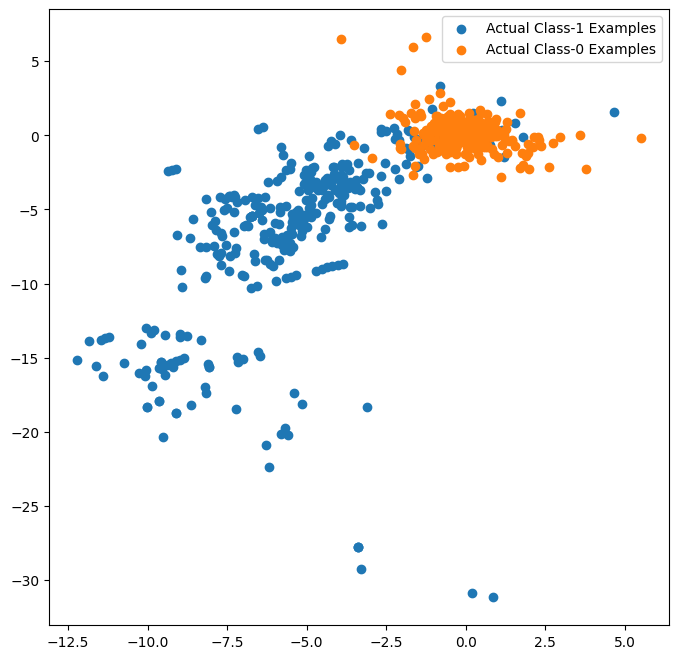

In [40]:
var_imp = []

for i in smote_xgb_cv_model.best_estimator_.feature_importances_:
    var_imp.append(i)

feature_importances = np.sort(smote_xgb_cv_model.best_estimator_.feature_importances_)

print('Top var:', var_imp.index(feature_importances[-1])+1)
print('2nd top var:', var_imp.index(feature_importances[-2])+1)
print('3rd top var:', var_imp.index(feature_importances[-3])+1)

top_var_index = var_imp.index(feature_importances[-1])
second_top_var_index = var_imp.index(feature_importances[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(8, 8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

plt.legend()
plt.show()

#### Model comparison after balancing classes using ADASYN

In [41]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_pt, y_train)

In [42]:
X_train_adasyn.shape

(398046, 21)

##### Logistic Regression

In [43]:
adasyn_lr_cv_model = random_search(
    name='ADASYN LogisticRegression',
    estimator=LogisticRegression(random_state=42),
    param_grid={
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg']
    },
    X_train_=X_train_adasyn,
    y_train_=y_train_adasyn
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'solver': 'lbfgs', 'C': 100}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


##### Decision Tree

In [44]:
adasyn_dt_cv_model = random_search(
    name='ADASYN DecisionTreeClassifier',
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    X_train_=X_train_adasyn,
    y_train_=y_train_adasyn
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best_params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


##### XGBoost

In [45]:
adasyn_xgb_cv_model = random_search(
    name='ADASYN XGBClassifier',
    estimator=XGBClassifier(random_state=42),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'max_leaves': [1, 2, 4]
    },
    X_train_=X_train_adasyn,
    y_train_=y_train_adasyn
)

model_cv_metrics

Fitting 3 folds for each of 10 candidates, totalling 30 fits


best_params: {'n_estimators': 300, 'max_leaves': 4, 'max_depth': 4, 'learning_rate': 0.1}


,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


##### Feature Importance

Top var: 4
2nd top var: 13
3rd top var: 12


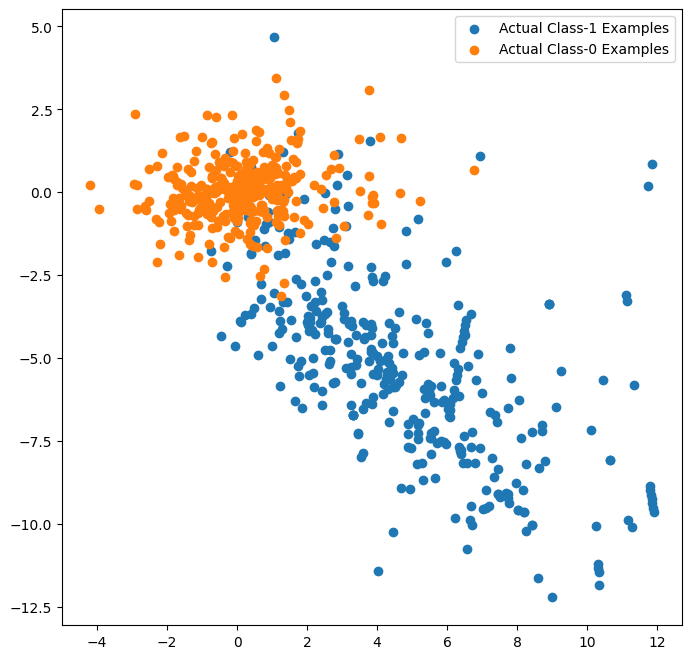

In [46]:
var_imp = []

for i in adasyn_xgb_cv_model.best_estimator_.feature_importances_:
    var_imp.append(i)

feature_importances = np.sort(adasyn_xgb_cv_model.best_estimator_.feature_importances_)

print('Top var:', var_imp.index(feature_importances[-1])+1)
print('2nd top var:', var_imp.index(feature_importances[-2])+1)
print('3rd top var:', var_imp.index(feature_importances[-3])+1)

top_var_index = var_imp.index(feature_importances[-1])
second_top_var_index = var_imp.index(feature_importances[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(8, 8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

plt.legend()
plt.show()

### Model evaluation

In [47]:
model_cv_metrics

,name,params,roc_auc,recall,test_roc_auc,test_recall
0,LogisticRegression,"{'solver': 'newton-cg', 'C': 0.01}",0.813898,0.627907,0.797215,0.594595
1,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 11}",1.000000,1.000000,0.861422,0.722973
2,SVC,"{'kernel': 'rbf', 'C': 0.01}",0.500000,0.000000,0.500000,0.000000
3,DecisionTreeClassifier,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.908372,0.816860,0.885047,0.770270
4,RandomForestClassifier,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.912771,0.825581,0.874941,0.750000
5,XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.908380,0.816860,0.874918,0.750000
6,ROS LogisticRegression,"{'solver': 'liblinear', 'C': 10}",0.952128,0.926319,0.927870,0.878378
7,ROS DecisionTreeClassifier,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999910,1.000000,0.864589,0.729730
8,ROS XGBClassifier,"{'n_estimators': 300, 'max_leaves': 4, 'max_de...",0.997724,1.000000,0.929906,0.864865
9,SMOTE LogisticRegression,"{'solver': 'lbfgs', 'C': 100}",0.948771,0.922917,0.929665,0.885135


Logistic Regression with balanced classes has consistently performed well across both training and test sets in terms of both ROC AUC and recall. 

XGBoost has promising results but seems to over-fit. 

Among these, the ROS Logistic Regression model has the highest ROC AUC and recall values on the test set, closely followed by SMOTE Logistic Regression. Therefore, either the ROS Logistic Regression or SMOTE Logistic Regression models would be good choices.

Threshold: 0.490
AUC: 0.928
Recall: 0.878


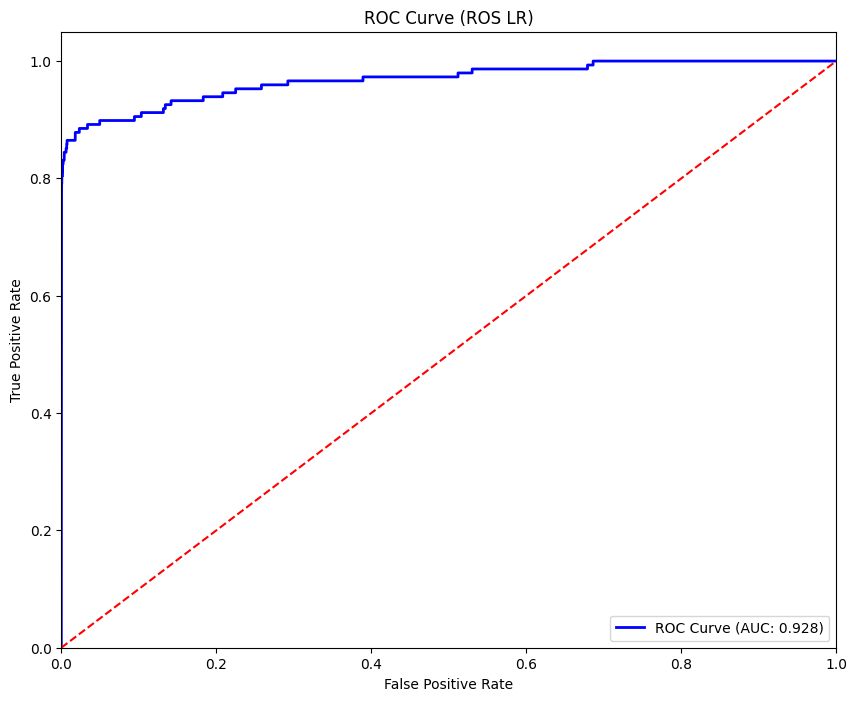

In [48]:
from sklearn.metrics import roc_curve

ros_lr_model = ros_lr_cv_model.best_estimator_
predicted_probabilities = ros_lr_model.predict_proba(X_test_pt)[:, 1]

# Use predicted probabilities to calculate the threshold
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
threshold = thresholds[np.argmax(tpr-fpr)]
print(f'Threshold: {threshold:.3f}')

# Assign predictions based on the threshold and calculate AUC score and Recall
y_test_pred = (predicted_probabilities > threshold).astype(int)
auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC: {auc_score:.3f}')
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.3f}')

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC: {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ROS LR)')
plt.legend(loc='lower right')
plt.show()

Threshold: 0.515
AUC: 0.927
Recall: 0.878


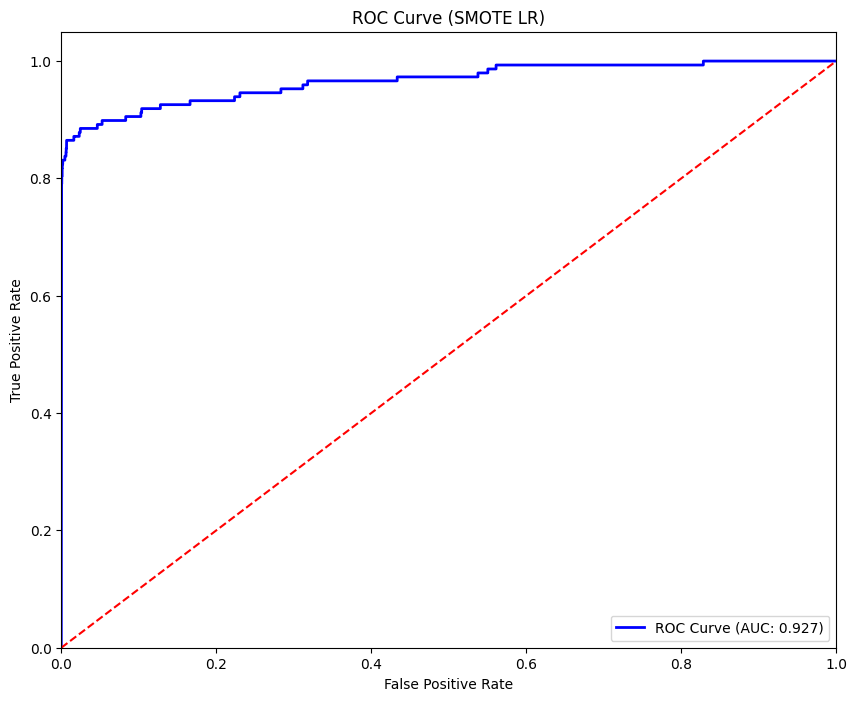

In [49]:
smote_lr_model = smote_lr_cv_model.best_estimator_
predicted_probabilities = smote_lr_model.predict_proba(X_test_pt)[:, 1]

# Use predicted probabilities to calculate the threshold
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
threshold = thresholds[np.argmax(tpr-fpr)]
print(f'Threshold: {threshold:.3f}')

# Assign predictions based on the threshold and calculate AUC score and Recall
y_test_pred = (predicted_probabilities > threshold).astype(int)
auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC: {auc_score:.3f}')
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.3f}')

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC: {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE LR)')
plt.legend(loc='lower right')
plt.show()

## Conclusion

Considering the similar performance in terms of AUC and recall, and considering the use case, it's often more critical to prioritize recall (i.e., catching as many frauds as possible), ROS Logistic Regression is slightly be preferred due to its lower threshold, implying a more sensitive detection approach. 

So, Logistic Regression over-sampled using Random Oversampling seems to the ideal choice. 

The following are the best parameters: 
```json
{
    'solver': 'liblinear', 
    'C': 10
}
```

The following table shows the metrics: 
| Metric | Score |
| --- | --- |
| Threshold | 0.490 |
| AUC | 0.928 |
| Recall | 0.878 |

The training pipeline includes,
1. PowerTransformer to remove skewness
2. Random Oversampling to balance classes
3. Logistic Regression to predict (tuned with 3 folds random search)

The overall prediction pipeline will include, 
1. PowerTransformer to remove skewness
2. Logistic Regression to predict